## Behaviour Cloning using Keras

assembled data
length of samples 8036


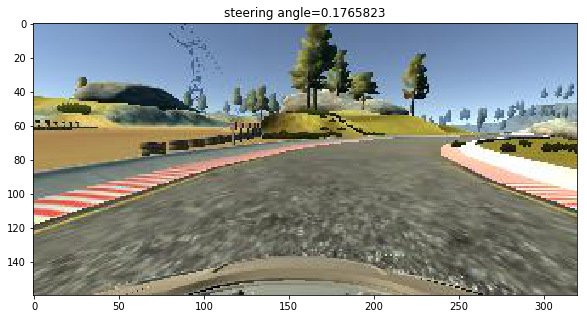

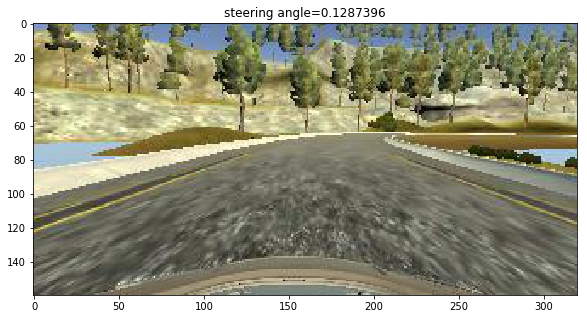

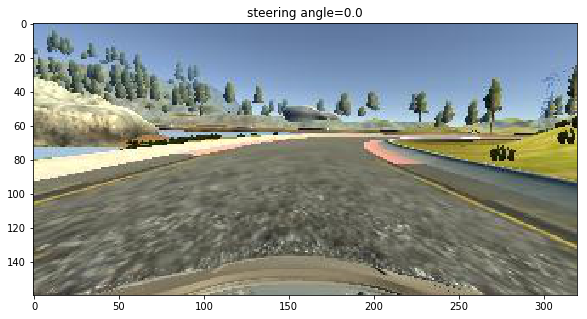

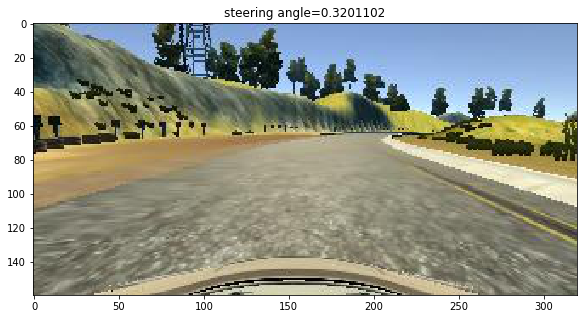

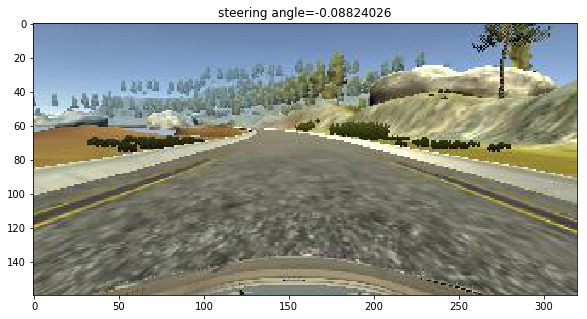

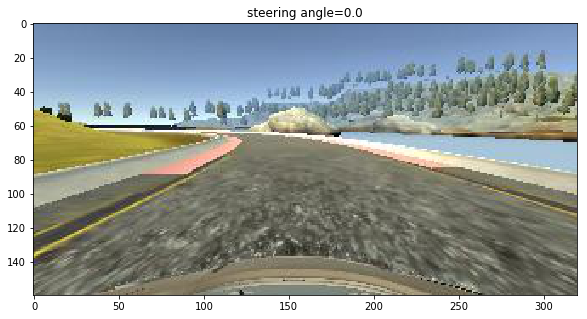

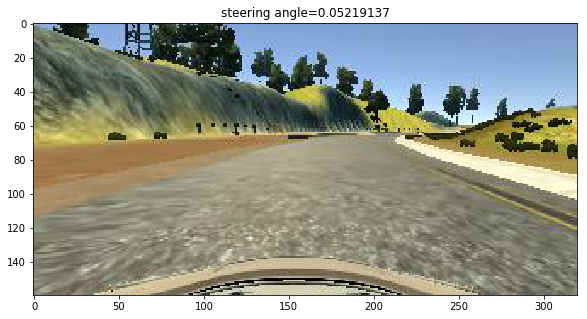

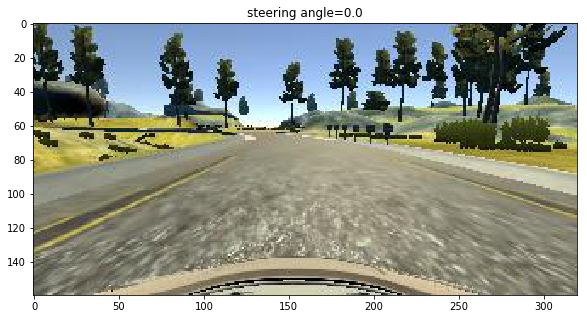

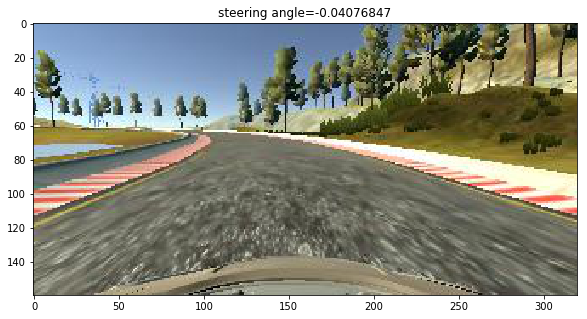

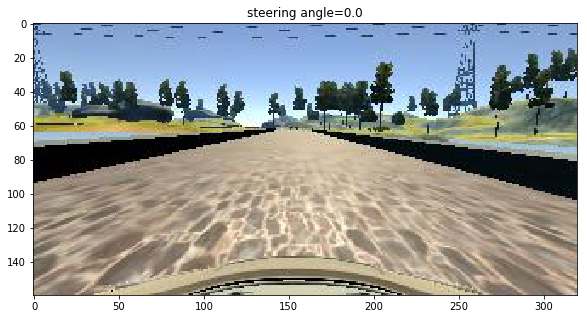

In [22]:
import numpy as np
import csv
import cv2
import sklearn
import random
from PIL import Image

samples=[]

with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

del(samples[0])
print("assembled data")
print("length of samples",len(samples))

for i in range(10):
    rand_inds = random.randint(0,len(samples))
    line = samples[rand_inds]
    file_name = 'data/IMG/'+line[0].split('/')[-1]
    measurement = float(line[3])
    image = np.asarray(Image.open(file_name))
    f = plt.figure(figsize=(10,5))
    plt.imshow(image)
    plt.title("steering angle="+ str(measurement))
    plt.show()
    f.savefig("output_images/"+str(i)+".jpg")

    
    

# from sklearn.model_selection import train_test_split
# train_samples, validation_samples = train_test_split(samples, test_size=0.2)
# print("assembled training and validation data")
# # Construct the generator to feed the training data
# def generator(samples, batch_size=128):
#     num_samples = len(samples)
#     while 1: # Loop forever so the generator never terminates
#         sklearn.utils.shuffle(samples) 
#         for offset in range(0, num_samples, batch_size):
#             batch_samples = samples[offset:offset+batch_size]
#             images = []
#             measurements = []
#             #For each row of the batch samples, get the location of images and values of angle 
#             for line in batch_samples:
#                 file_name = 'data/IMG/'+line[0].split('/')[-1]
#                 measurement = float(batch_sample[3])
                
#                 # Exclude data which have less tan 0.005 steering angle,
#                 # So model will biased to go straight
                
#                 # If the measurement of the angle is larger than 0.005
#                 if abs(measurement) > 0.005:
#                     measurements.append(measurement) #append the angle to list.
#                     # image = np.asarray(Image.open(name))
#                     image = np.asarray(Image.open(file_name))
#                     images.append(image) #append the image to list.
#                     flipped_img = cv2.flip(image,1) #flip the same image
#                     images.append(flipped_img) # append the flipped image
#                     measurements.append(-measurement) # append the sign changed angle

#                 # If the measurement of the angle is less than 0.005
#                 elif abs(measurement) <= 0.005:
#                     prob = np.random.random()
#                     if prob > 0.90: # allow 10% of the measurements
#                         measurements.append(measurement)#append the angle to list.
#                         image = np.asarray(Image.open(file_name))
#                         images.append(image) #append the image to list.
#                         flipped_img = cv2.flip(image,1) #flip the same image
#                         images.append(flipped_img) # append the flipped image
#                         measurements.append(-measurement) # append the sign changed angle

#             X_train = np.array(images)
#             y_train = np.array(measurements)
#             yield sklearn.utils.shuffle(X_train, y_train)
# # def generator(samples, batch_size=128):
# #     num_samples = len(samples)
# #     while 1: # Loop forever so the generator never terminates
# #         sklearn.utils.shuffle(samples)
# #         for offset in range(0, num_samples, batch_size):
# #             batch_samples = samples[offset:offset+batch_size]

# #             images=[]
# #             measurements=[]

# #             for line in batch_samples:
# #                 for i in range(3):
# #                     path = line[i]
# #                     tokens = path.split('/')
# #                     filename = tokens[-1]
# #                     local_path = "data/IMG/"+filename
# #                     image = cv2.imread(local_path)
# #                     image = image[:,:,::-1] # To convert to RGB
# #                     images.append(image)
# #                 correction=0.2
# #                 measurement = float(line[3])
# #                 measurements.append(measurement)
# #                 measurements.append(measurement+correction)# Left image
# #                 measurements.append(measurement-correction)# Right image


# #             augmented_imgs=[]
# #             augmented_mments=[]
# #             for image,measurement in zip(images,measurements):
# #                 augmented_imgs.append(image)
# #                 augmented_mments.append(measurement)
# #                 flipped_img = cv2.flip(image,1)
# #                 flipped_mment = float(measurement)*-1.0
# #                 augmented_imgs.append(flipped_img)
# #                 augmented_mments.append(flipped_mment)

# #             # trim image to only see section with road
# #         X_train = np.array(augmented_imgs)
# #         y_train = np.array(augmented_mments)
# #         yield sklearn.utils.shuffle(X_train, y_train)

# # compile and train the model using the generator function
# train_generator = generator(train_samples, batch_size=64)
# validation_generator = generator(validation_samples, batch_size=64)


# import keras
# from keras.models import Sequential
# from keras.layers import Flatten, Dense, Lambda
# from keras.layers.convolutional import Convolution2D,Cropping2D
# from keras.layers.pooling import MaxPooling2D

# model = Sequential()
# model.add(Lambda(lambda x: x/127.5 - 1 , input_shape=(160, 320, 3)))# Normalization between -1 and 1
# model.add(Cropping2D(cropping=((70,25),(0,0)))) # Apply cropping to remove sky and bonet.

# # Add layers adapted from Nvidia End-to-End

# model.add(Convolution2D(24,5,5,subsample=(2,2),activation='relu'))
# model.add(Convolution2D(36,5,5,subsample=(2,2),activation='relu'))
# model.add(Convolution2D(48,5,5,subsample=(2,2),activation='relu'))
# model.add(Convolution2D(64,3,3,activation='relu'))
# model.add(Convolution2D(64,3,3,activation='relu'))
# model.add(Flatten())
# # model.add(MaxPooling2D())
# model.add(Dense(100))
# model.add(Dense(50))
# model.add(Dense(10))
# model.add(Dense(1)) 
# print("starting training")
# model.compile(optimizer='adam', loss='mse')
# # model.fit(X_train,y_train,validation_split=0.2,shuffle=True)
# model.fit_generator(train_generator, 
#                     samples_per_epoch = len(train_samples)/16, 
#                     validation_data=validation_generator,
#                     nb_val_samples=len(validation_samples)/16, 
#                     nb_epoch=20, verbose =2)

# # Save the model
# model.save('model.h5')





In [4]:
# from keras.models import Model
# import matplotlib.pyplot as plt

# history_object = model.fit_generator(train_generator, samples_per_epoch =
#     len(train_samples), validation_data = 
#     validation_generator,
#     nb_val_samples = len(validation_samples), 
#     nb_epoch=3, verbose=1)

# ### print the keys contained in the history object
# print(history_object.history.keys())

# ### plot the training and validation loss for each epoch
# plt.plot(history_object.history['loss'])
# plt.plot(history_object.history['val_loss'])
# plt.title('model mean squared error loss')
# plt.ylabel('mean squared error loss')
# plt.xlabel('epoch')
# plt.legend(['training set', 'validation set'], loc='upper right')
# plt.show()